# Assignment 4: Association Rules
### Problem Statement 3:
A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data and come up with different rules of movie list so that the business objective is achieved.

### **Business Objectives:**
- **Audience Segmentation:** The company wants to categorize audiences based on their movie preferences (likes and dislikes) to identify patterns in viewing behavior.

- **Personalized Recommendations:** Generate movie recommendation rules that can target specific audience segments, improving customer engagement and increasing the likelihood of movie purchases or viewings.

- **Increase Sales and Engagement:** By targeting the right audience with tailored movie lists, the company aims to drive more sales, rentals, or viewership for its films.

- **Optimize Marketing Campaigns:** The company can use these insights to refine marketing campaigns, promoting the right movies to the right audience, thus improving marketing ROI.


### **Constraints:**
- **Data Quality:** The likes and dislikes data must be accurate and complete for the algorithm to produce reliable insights. Missing or noisy data could reduce the effectiveness of recommendations.

- **Scalability:** The model must be scalable to accommodate large datasets since the distribution company deals with a wide range of movies and a broad audience.
- **Diversity of Preferences:** The audience might have highly diverse tastes, making it challenging to create generalized rules that fit all segments.

- **Computational Resources:** Running algorithms like Association Rules for large datasets may require significant computational power and time, which can limit the speed of generating insights.

In [1]:
import pandas as pd
df=pd.read_csv('my_movies.csv')
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(10, 10)

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules
#step 1: apply the apriori algorithm to find frequent itemsets
frequent_itemsets=apriori(df,min_support=0.2,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [7]:
#step 2: Generate association rules from the frequent itemsets
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# step 3: output the results
print("frequent itemsets:")
print(frequent_itemsets)
print("\nAssociation rules:")
print(rules)

frequent itemsets:
    support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Gladiator, Sixth Sense)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Gladiator, Patriot)
11      0.2                     (LOTR1, LOTR2)
12      0.4  (Gladiator, Sixth Sense, Patriot)

Association rules:
                 antecedents               consequents  antecedent support  \
0                (Gladiator)             (Sixth Sense)                 0.7   
1              (Sixth Sense)               (Gladiator)                 0.6   
2              (Sixth Sense)                 (Patriot)               

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Sort rules by lift in descending order
import matplotlib.pyplot as plt
rules_sorted_by_lift = rules.sort_values('lift', ascending=False)
top_n_rules = rules_sorted_by_lift.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


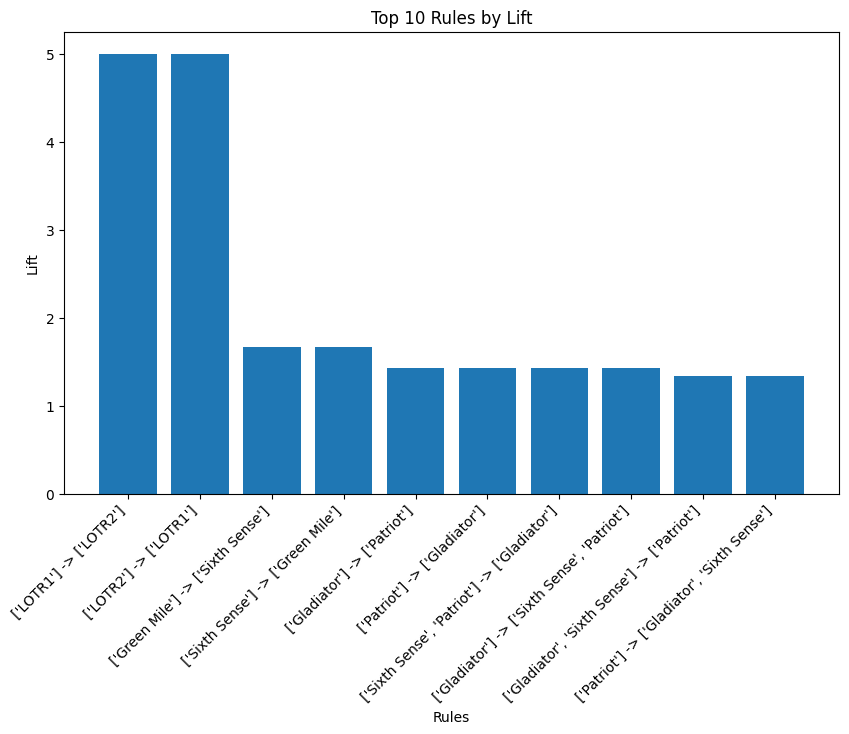

In [13]:
#bar chart for lift
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_n_rules)), top_n_rules['lift'])
plt.xticks(range(len(top_n_rules)), top_n_rules.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.title('Top 10 Rules by Lift')
plt.show()

In [14]:
# Sort rules by confidence in descending order
rules_sorted_by_confidence = rules.sort_values('confidence', ascending=False)
top_n_rules = rules_sorted_by_confidence.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


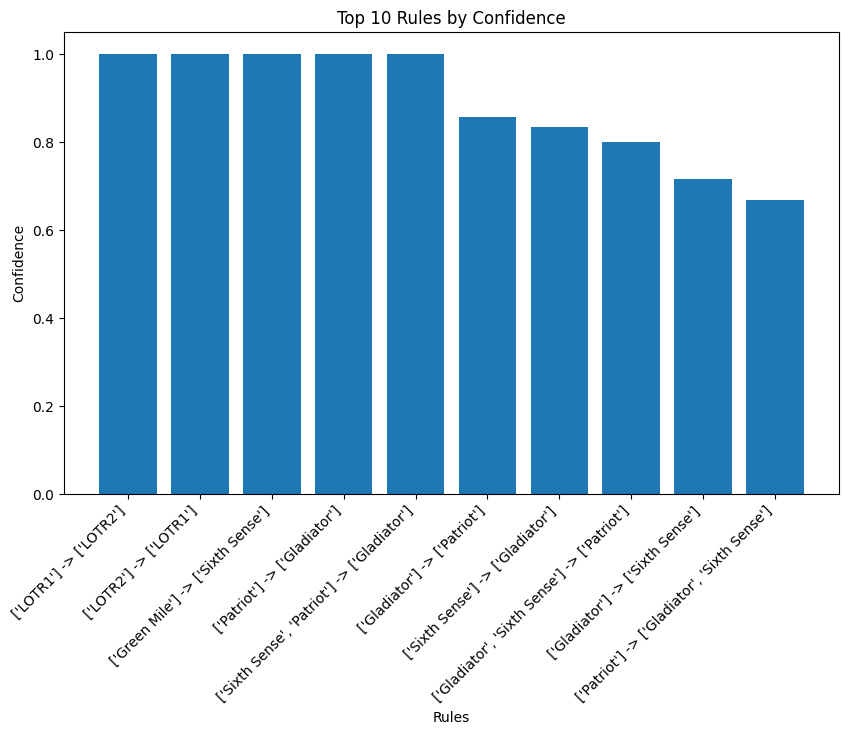

In [15]:
#bar chart for confidence
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_n_rules)), top_n_rules['confidence'])
plt.xticks(range(len(top_n_rules)), top_n_rules.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Confidence')
plt.title('Top 10 Rules by Confidence')
plt.show()

In [1]:
!git add "PS 3 (movies).ipynb"
!git commit -m "Added Solution for PS 3"
!git push

[main 4486d3c] Added Solution for PS 3
 1 file changed, 755 insertions(+)
 create mode 100644 Assignment-4 Association Rules/PS 3 (movies).ipynb
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 125.15 KiB | 2.84 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:parth-gz/Data-Science-Assignments
   c754bb2..4486d3c  main -> main
